# Project Name :   EDA by installed dataset from sql to Jupiternotebook .
- the student _marks dataset main aim to explore datas to get more idea and information about dataset

In [1]:
# make a connection with mysql ,fetch the data of students marks in notebook.
# installed my sql connector
!pip install mysql-connector-python

In [2]:
# import important libraries
import mysql.connector # importing my sql connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # formating data categorical to numerical
# import all classification algorithm to choose best performing model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
# making connection with jupytenotebook
con = mysql.connector.connect(
host="localhost",# this is bydefault take ip address 
port=3306,
user="root",
password="7030712359",
database="student")

In [4]:
# let's checking data is loaded or not in jupyternotebook

stud = pd.read_sql_query("select * from studentmark",con,parse_dates=["DOB"])
stud.head(11)

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,M,1988-04-05,55,45,56,87,21,52,89,65
1,M,1987-05-04,75,96,78,64,90,61,58,2
2,M,1989-05-25,25,54,89,76,95,87,56,74
3,F,1990-08-12,78,96,86,63,54,89,75,45
4,F,1989-09-02,58,96,78,46,96,77,83,53
5,F,1988-04-05,45,87,52,89,55,89,87,52
6,F,1987-05-04,55,64,61,58,75,58,64,61
7,M,1989-05-25,54,76,87,56,25,56,76,87
8,F,1990-08-12,55,63,89,75,78,75,63,89
9,M,1989-09-02,96,46,77,83,58,83,46,77


# ## Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation     and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variabl
- finding and removing outliers



# Let's we do EDA analysis of student_marks dataset

In [5]:
# as we see data is succesfully loaded in jupyter notbook
stud.tail()
# check below five raw

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
5,F,1988-04-05,45,87,52,89,55,89,87,52
6,F,1987-05-04,55,64,61,58,75,58,64,61
7,M,1989-05-25,54,76,87,56,25,56,76,87
8,F,1990-08-12,55,63,89,75,78,75,63,89
9,M,1989-09-02,96,46,77,83,58,83,46,77


# Univariate Analysis
    

In [6]:
stud.dtypes

Gender               object
DOB          datetime64[ns]
Maths                 int64
Physics               int64
Chemistry             int64
English               int64
Biology               int64
Economics             int64
History               int64
Civics                int64
dtype: object

In [7]:
# now check feature name which abilable in the dataset
stud.columns

Index(['Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English', 'Biology',
       'Economics', 'History', 'Civics'],
      dtype='object')

In [8]:
# check more information related to dataset
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Gender     10 non-null     object        
 1   DOB        10 non-null     datetime64[ns]
 2   Maths      10 non-null     int64         
 3   Physics    10 non-null     int64         
 4   Chemistry  10 non-null     int64         
 5   English    10 non-null     int64         
 6   Biology    10 non-null     int64         
 7   Economics  10 non-null     int64         
 8   History    10 non-null     int64         
 9   Civics     10 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 928.0+ bytes


In [9]:
# check # let's finding null value whether it is available in the dataset or not.

print('total number of null values:\n',stud.isnull().sum())


total number of null values:
 Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64


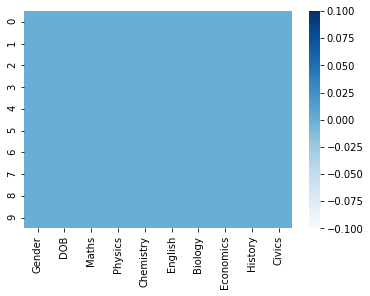

In [10]:
# let's visualize null values using heatmap
sns.heatmap(stud.isnull(),cmap='Blues')

In [11]:
# univariate analysis of continuous  data variable using a describe() function
# describe function provide  statistics summary of continuous variable.

stud.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [12]:
# now we check how many unique values in the Gender column 
stud['Gender'].value_counts()

F    5
M    5
Name: Gender, dtype: int64

# Observation point 

- the studentmark dataset has  rows 10 with 10 features.
- in which Gender and date are in object form and all mark features is  numeric in nature.
- in Gender column male and female is eqaul.
- the heatmap and above data information confirms , their is no missing and Nan values in the studentdataset.
- there is a large difference in 75th -- - percentile and max in Maths and Civics column 
- and also mean is high in the Maths column followed by Physics

## List of Variable Name:-
1. Gender- M- male, F- female	
2. DOB	
- all subject

1. Maths	
2. Physics	
3. Chemistry	
4. English	
5. Biology	
6. Economics	
7. History	
8. Civics


In [13]:
col= stud.columns.values

#now we check hom many unique values in each columns

list((columns,np.unique(stud[columns].astype(str)).size) for columns in col)


[('Gender', 2),
 ('DOB', 5),
 ('Maths', 8),
 ('Physics', 8),
 ('Chemistry', 8),
 ('English', 10),
 ('Biology', 10),
 ('Economics', 9),
 ('History', 10),
 ('Civics', 10)]

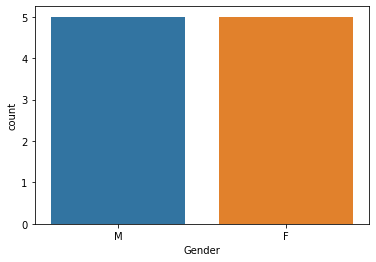

In [14]:
# Let's do some plotting to know how the data columns are distributed in the dataset¶
# univariate data analysis by graphical representation

# firstly we will plotting Gender feture with help of counplot 
sns.countplot(x='Gender',data=stud)

# this is show M and F are equallty disributed 

In [15]:
# here we remove DOB column because its not use for data exploration 
stud.drop('DOB',axis=1,inplace=True)

In [16]:
# lets check  skewedness of data 
# we use skew function to check skewdness
stud.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [17]:
# lets plot a distplot to now variables in dataset are normally distributed or not
collist=stud.columns.values
ncol=12
nrows=10

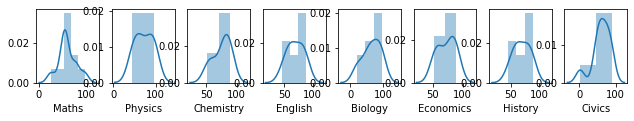

In [18]:
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(stud[collist[i]])
    

# According to distplot all variables in the student marks dataset have normal distribution except civics.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214F0B99688>,
      dtype=object)

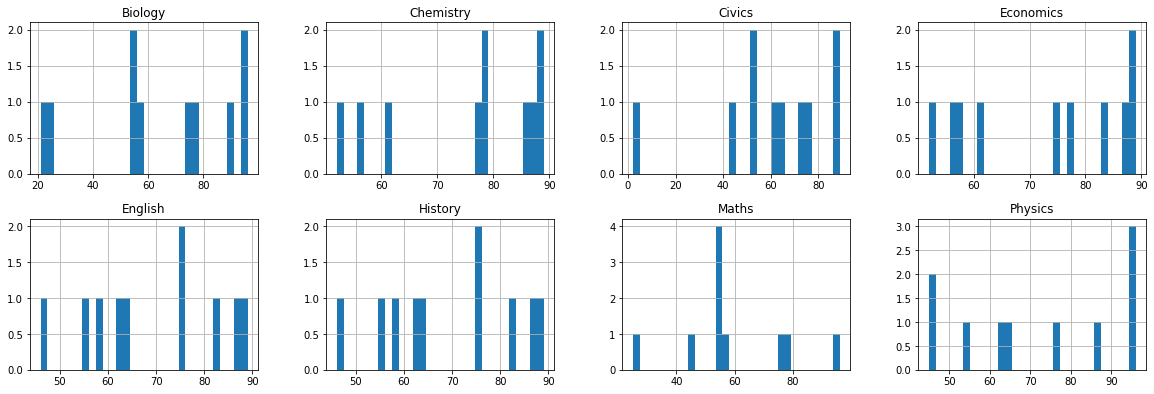

In [19]:
# let's plot histogram to check all feature in the dataset whether normal distribution or n
stud.hist(figsize=(20,10),layout=(3, 4), bins = 30)

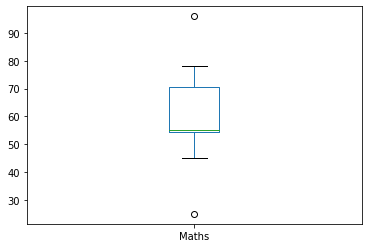

In [20]:
# lets check whether outliers are present or not using boxplot
# according to statical observation there is a large difference in 75th -- - percentile and max in Maths and Civics column
# and also mean is high in the Maths column followed by Physics so we check outliers first these three column.

stud['Maths'].plot.box()
# its shows maths column has  otliers because huge difference in minimum and maximum marks.

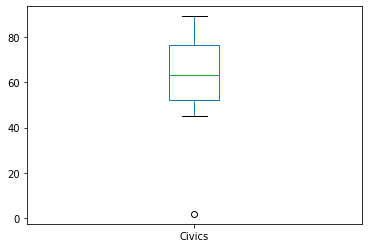

In [21]:
stud['Civics'].plot.box()
# in the Civics column  some of student got minimum marks less then 5

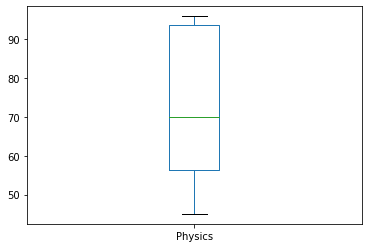

In [22]:
stud['Physics'].plot.box()

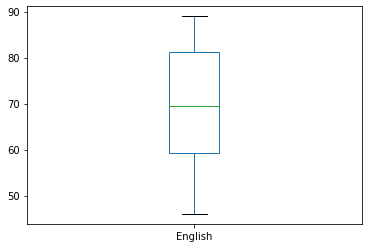

In [23]:
stud['English'].plot.box() # its show in English marks column have no outliers

# Bivariate analysis - tacking two column or two variable and looking the relationship between them,and also find correlation and covariance within two variable¶

In [24]:
#fig = plt.figure(figsize = (10,6))
#sns.barplot(x = 'Gender', y = 'Maths', data = stud)
def bar_chart(feature):
    Female = stud[stud['Gender']=='F'][feature] # this way called boolean mask
    Male  = stud[stud['Gender']=='M'][feature]
    df       = pd.DataFrame([Female,Male])
    df.index=['Female','Male']
    df.plot(kind='bar',stacked=False,figsize=(10,5))
    

[English  Gender
46       F         1.0
56       M         1.0
58       F         1.0
63       F         1.0
64       M         1.0
75       F         1.0
76       M         1.0
83       M         1.0
87       M         1.0
89       F         1.0
Name: Gender, dtype: float64]


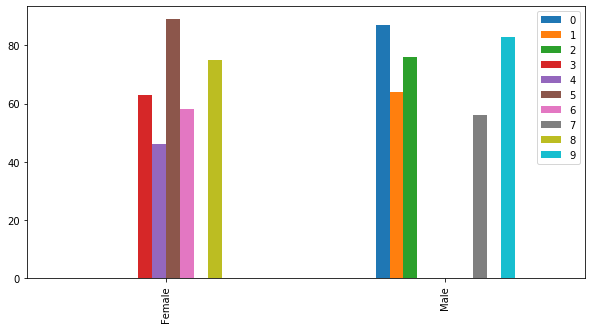

In [25]:
bar_chart('English')
print([stud.groupby('English')['Gender'].value_counts(normalize=True)])

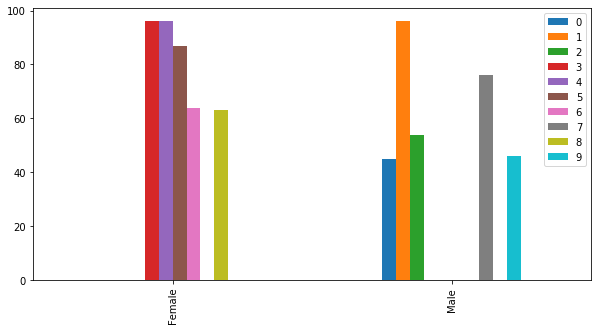

In [26]:
bar_chart('Physics')

[Civics  Gender
2       M         1.0
45      F         1.0
52      F         1.0
53      F         1.0
61      F         1.0
65      M         1.0
74      M         1.0
77      M         1.0
87      M         1.0
89      F         1.0
Name: Gender, dtype: float64]


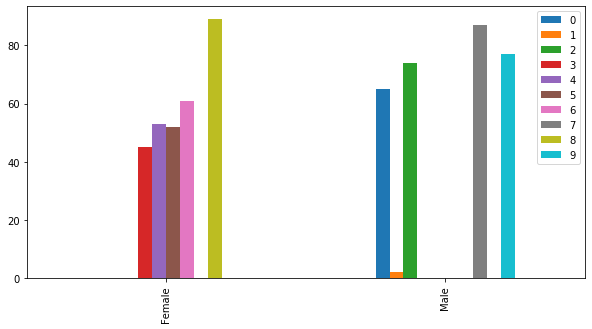

In [27]:
bar_chart('Civics')
print([stud.groupby('Civics')['Gender'].value_counts(normalize=True)])

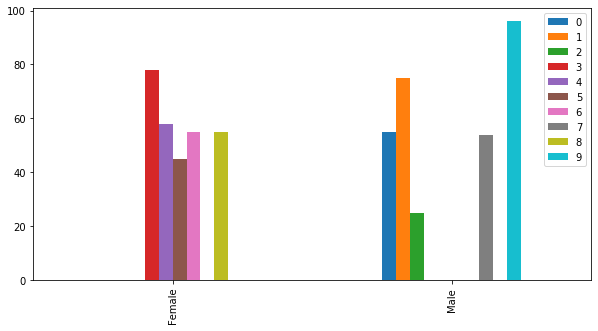

In [28]:
bar_chart('Maths')

[Biology  Gender
21       M         1
25       M         1
54       F         1
55       F         1
58       M         1
75       F         1
78       F         1
90       M         1
95       M         1
96       F         1
Name: Gender, dtype: int64]


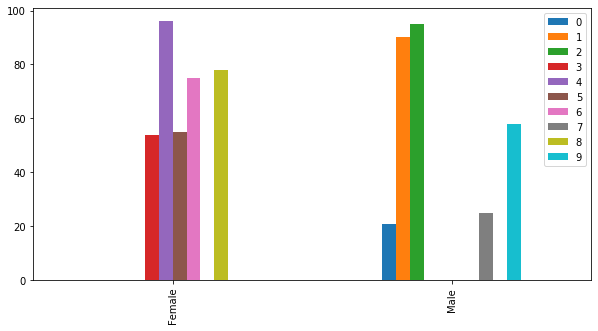

In [29]:
bar_chart('Biology')
print([stud.groupby('Biology')['Gender'].value_counts()])

[Chemistry  Gender
52         F         1
56         M         1
61         F         1
77         M         1
78         F         1
           M         1
86         F         1
87         M         1
89         F         1
           M         1
Name: Gender, dtype: int64]


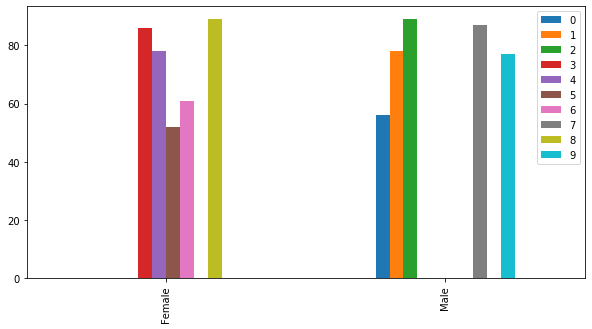

In [30]:
bar_chart('Chemistry')
print([stud.groupby('Chemistry')['Gender'].value_counts()])

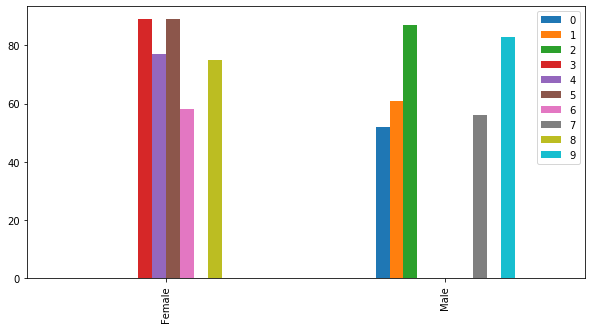

In [31]:
bar_chart('Economics')

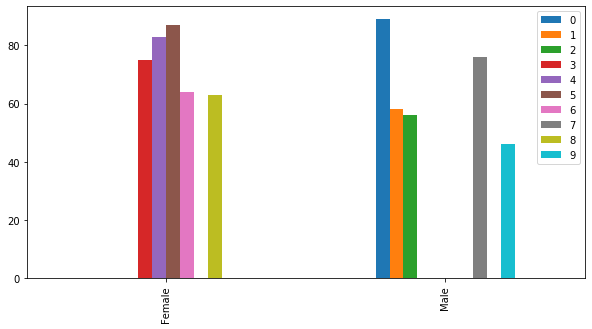

In [32]:
bar_chart('History')

# Observation for barplot
- the above graph confirms highest markes in english subject is obtained by female student as compare by male.
- the above graph confirms highest markes in  Maths subject is obtained by male student as compare by female.
- the above graph confirms highest markes in  Physics subject is obtained by female student as compare by male.
- the above graph confirms highest markes in  History subject is obtained by female student as compare by male.
- the above graph confirms highest markes in  Economics subject is obtained by female student as compare by male.
- the above graph confirms highest markes in  Civics subject is obtained by female student as compare by male.
- the above graph confirms highest markes in   Biology is obtained by female student as compare by male.
- the above graph confirms minimum markes in   Chemistry is obtained by female student as compare by male.


In [33]:
#Now lets assign a labels to our Gender variable
#Female- 1 and male-0
label_quality = LabelEncoder()
stud['Gender'] = label_quality.fit_transform(stud['Gender'])
stud.head(2)

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,1,55,45,56,87,21,52,89,65
1,1,75,96,78,64,90,61,58,2


In [34]:
stud['Gender'].value_counts()

1    5
0    5
Name: Gender, dtype: int64

In [35]:
# now we will use correlation matrix
data=stud.corr()
data

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Gender,1.000000,0.075832,-0.454052,0.158109,0.255257,-0.269398,-0.353067,-0.342774,0.020796
Maths,0.075832,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,-0.454052,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.158109,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,0.255257,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.269398,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,-0.353067,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.342774,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,0.020796,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


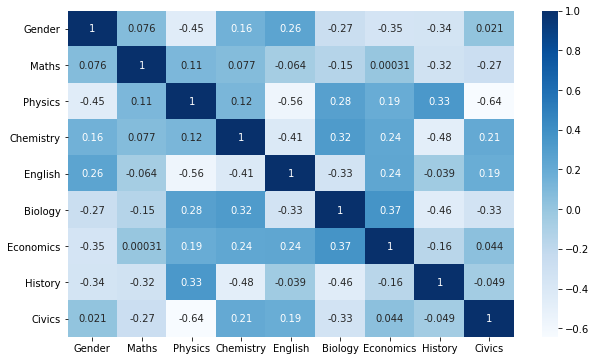

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data,cmap='Blues',annot=True) 

In [37]:
stud.skew() # we see skewedness from Civics dataset is removed it comes in form of normal distribution

Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [38]:
# let's we remove outliers in the student mark dataset by using Z-score method

from scipy.stats import zscore

z_score=(zscore(stud))
print(stud.shape)
stud=stud.loc[(z_score<3).all(axis=1)]
print(stud.shape)

(10, 9)
(10, 9)


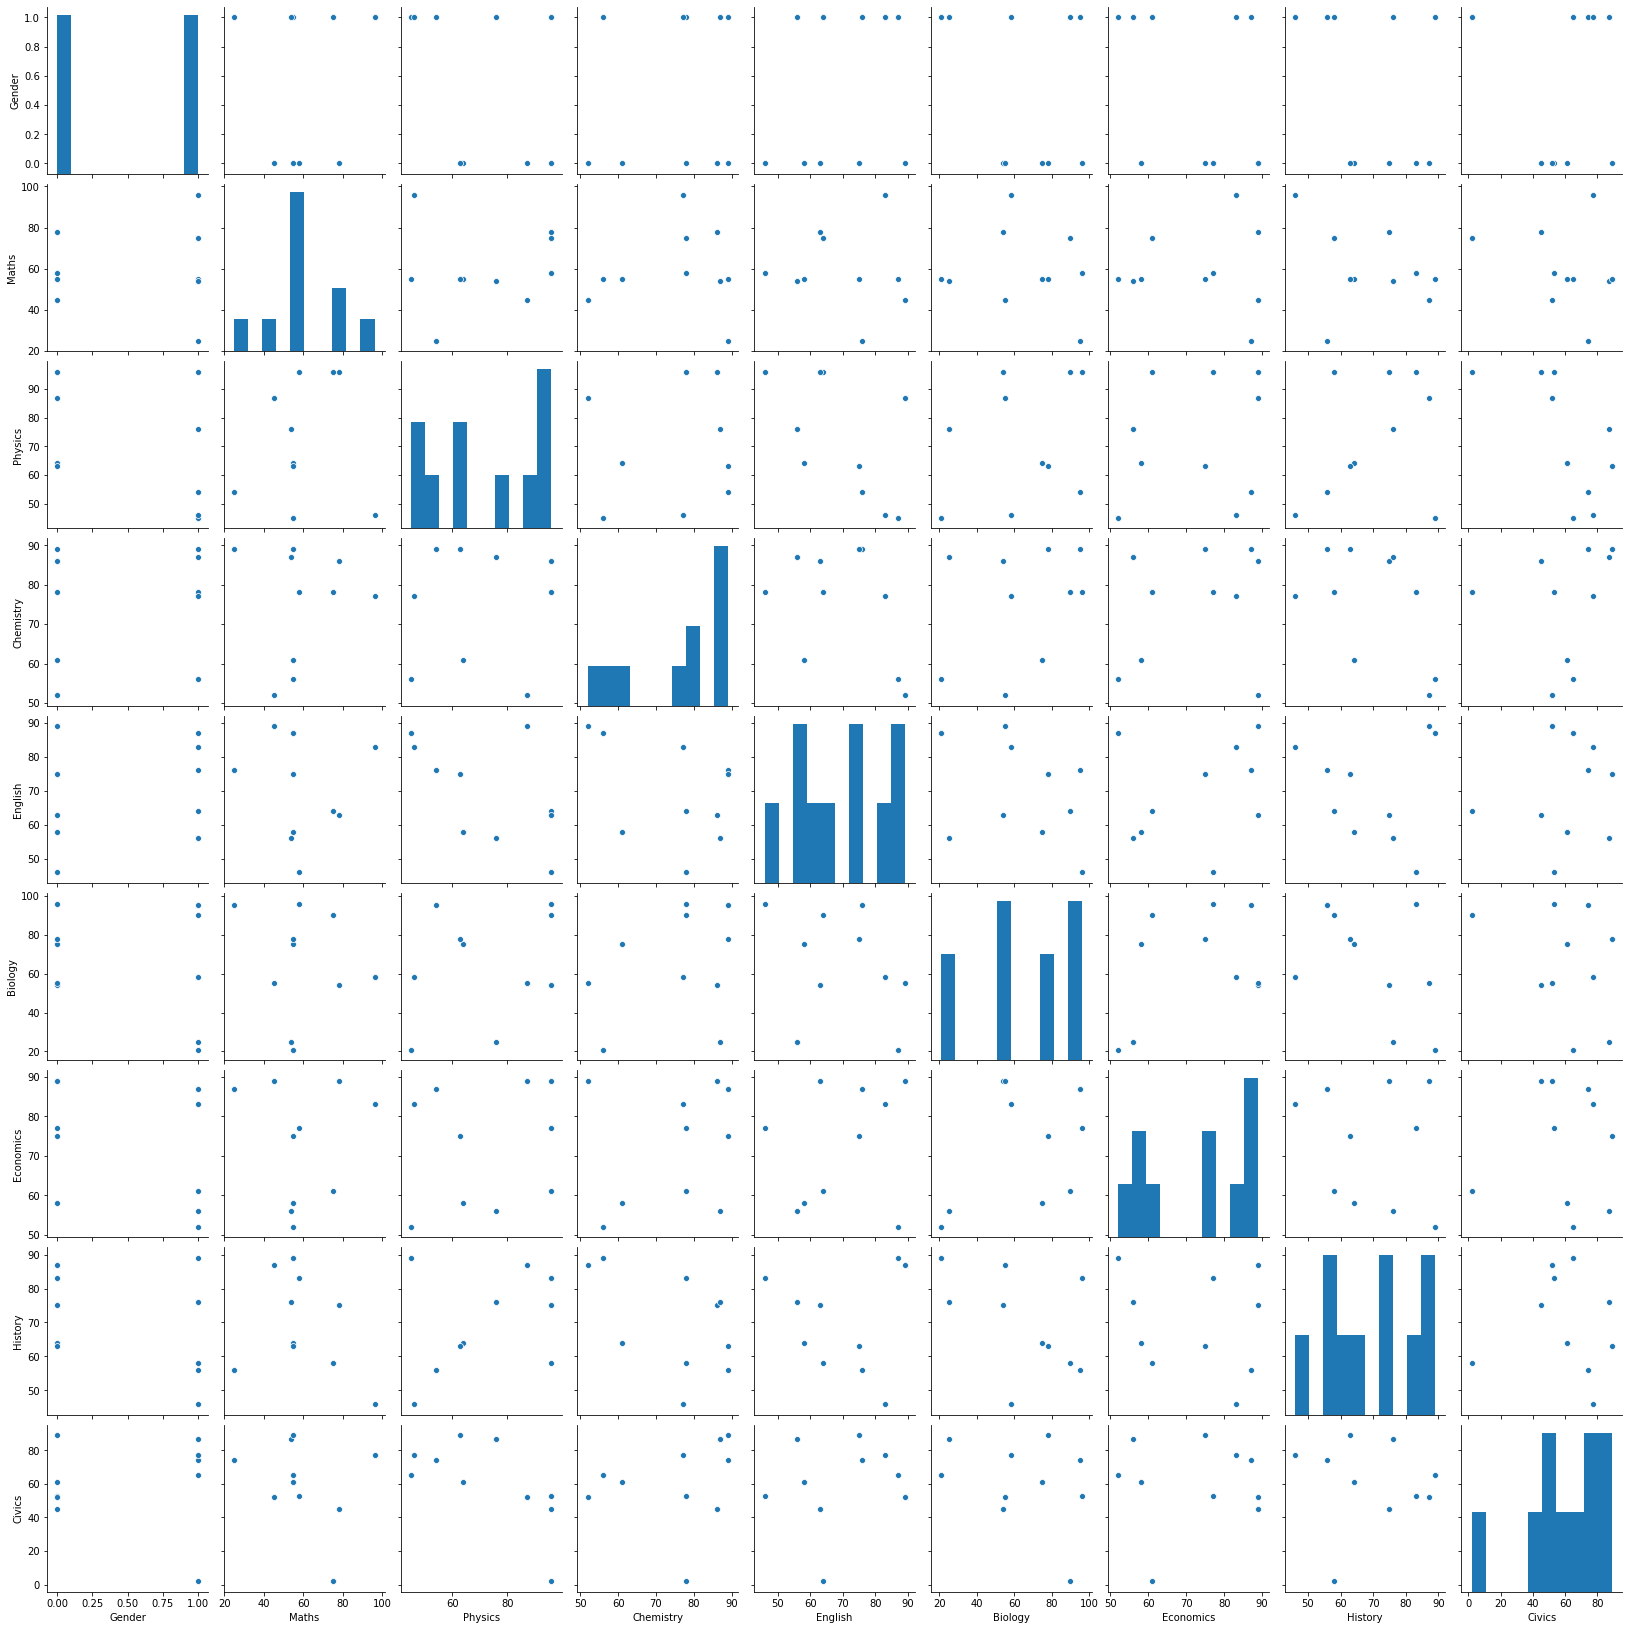

In [39]:
sns.pairplot(stud)

In [40]:
#Now seperate the dataset as input variable and output variabes

x = stud.drop('Gender', axis = 1)
y = stud['Gender']

In [41]:
print(x.shape)
print(y.shape)

(10, 8)
(10,)


In [42]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.24916243, -1.39276651, -1.45310069,  1.26169862, -1.70618534,
        -1.49152635,  1.40755973,  0.18716723],
       [ 0.83415247,  1.20910499,  0.20328352, -0.41570417,  0.98779152,
        -0.84303663, -0.85328751, -2.43317398],
       [-1.87413478, -0.93361271,  1.03147562,  0.4594625 ,  1.18300723,
         1.03037811, -0.99914862,  0.56150169],
       [ 0.99664971,  1.20910499,  0.80560505, -0.48863473, -0.41776163,
         1.17448693,  0.38653195, -0.64468712],
       [-0.08666519,  1.20910499,  0.20328352, -1.72845418,  1.22205037,
         0.30983398,  0.9699764 , -0.31194538],
       [-0.79081988,  0.7499512 , -1.75426145,  1.40755973, -0.37871849,
         1.17448693,  1.26169862, -0.3535381 ],
       [-0.24916243, -0.42344183, -1.07664973, -0.85328751,  0.40214437,
        -1.05919987, -0.41570417,  0.02079636],
       [-0.30332817,  0.18876323,  0.88089524, -0.99914862, -1.55001277,
        -1.2033087 ,  0.4594625 ,  1.10220702],
       [-0.24916243, -0.47445892

In [43]:
# Train and Test splitting of data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [44]:
# we choose linear model because student marks is a continuos in nature and data is distributed in linearly 
#less overlaped data according to pairplot

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [45]:
lr.score(x_train,y_train)

1.0

In [46]:
lr.coef_# 

array([ 0.03405755, -0.16653329,  0.13351291,  0.20248206,  0.03917458,
        0.0828297 ,  0.25537987,  0.68141133])

In [47]:
lr.intercept_#its in positive manner

0.41846173143428256

In [49]:
# predict the output
y_predln=lr.predict(x_test)
print(r2_score(y_test,y_predln))
print("means square error:",mean_squared_error(y_test,y_predln))
print("mean absolute error:",mean_absolute_error(y_test,y_predln))


-13.466194529540582
means square error: 3.214709895453463
mean absolute error: 1.5405750373040084
